### 简繁转换

In [1]:
from hanziconv import HanziConv

In [2]:
inputdir = outputdir = 'C:\\Users\\xhc\\Desktop\\temp'

In [4]:
 print(HanziConv.toSimplified('繁簡轉換器'))

繁简转换器


In [14]:
with open(inputdir+'\\wiki_00','r',encoding='UTF-8') as rf,open(outputdir+'\\simple.txt','a',encoding='UTF-8') as wf:
    #print(rf.readlines())
    for line in rf.readlines():
        simline = HanziConv.toSimplified(line)
        wf.write(simline)    
        

### 加载停用词

In [7]:
stopWord = []
with open(inputdir+'\\中文停用词表.txt','r',encoding='UTF-8') as rf:
    for line in rf.readlines():
        word = line.strip()
        stopWord.append(word)

In [11]:
stopWord[20:30]

['一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼']

In [12]:
len(stopWord)

746

### 结巴分词

In [14]:
import jieba

In [37]:
with open(inputdir+'\\simple.txt','r',encoding='UTF-8') as rf,open(outputdir+'\\cutdown.cor','a',encoding='UTF-8') as wf:
    for line in rf.readlines():
        cutdown=[]
        for word in jieba.cut(line.strip()):
            if word not in stopWord:
                cutdown.append(word)
        wf.write(' '.join(cutdown)+'\n')            
        

### 模型训练

In [1]:
import gensim.models.word2vec as w2v
model_name='C:\\Users\\xhc\\Desktop\\temp\\model\\model_base_wiki'

In [ ]:
#模型训练
sentences = w2v.LineSentence(outputdir+'\\cutdown1.cor')
model = w2v.Word2Vec(sentences,size=200,window=5,min_count=5,workers=6)
model.save(model_name)

C:\DevSoft\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [2]:
model = w2v.Word2Vec.load(model_name)

C:\DevSoft\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


### 模型测试

In [3]:
model.wv['测试']

array([ 0.31251642, -0.45858604,  0.02293889,  0.27174574,  0.2699356 ,
        0.04985124, -0.5997937 , -0.03486191,  1.1695303 , -0.37113416,
        0.09834094, -0.62859005,  0.01190478,  0.35439095, -0.50518185,
        0.09598099,  0.22837847,  0.92325807, -0.19037002,  0.01320966,
       -0.32489836,  0.07397578,  0.88679326,  0.04397937, -0.13893935,
        0.4762366 , -0.2805635 , -0.20863469, -0.4158004 , -0.5328404 ,
       -0.24825414, -0.3586593 ,  0.23871042, -0.1269175 ,  0.68497217,
       -0.7615936 , -1.0586587 ,  0.49762824,  0.29071778,  0.224906  ,
       -1.0068558 , -0.6676447 , -0.40588948,  0.24674606,  0.4419857 ,
       -0.71734583,  0.05404665, -0.20306887, -0.42801744,  0.1987855 ,
       -0.1645144 , -0.23040402,  0.2846303 ,  0.25024077,  0.07135139,
        0.39500403, -0.31490773,  0.8545735 ,  0.05901965,  0.29433352,
       -0.06346324,  0.00409648, -0.44562086, -0.22497842,  0.19416872,
        0.4674694 , -0.30001277, -0.03427699, -0.22103967,  0.07

In [4]:
len(model.wv.vocab)

65975

In [8]:
model.most_similar('测试') #找到最相近的词

C:\DevSoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('试验', 0.9470357894897461),
 ('检测', 0.898607611656189),
 ('搜寻', 0.887345552444458),
 ('更新', 0.8867768049240112),
 ('同步', 0.8789533972740173),
 ('操作', 0.8770647048950195),
 ('传送', 0.8769000768661499),
 ('自动', 0.8682835102081299),
 ('样本', 0.8660552501678467),
 ('引擎', 0.8658863306045532)]

In [8]:
model.wv.distance('美丽','漂亮')

0.27664458751678467

In [9]:
model['数学'].shape

C:\DevSoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(200,)

### 模型展示

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    i = 0
    for word in model.wv.vocab:
        i += 1
        tokens.append(model[word])
        labels.append(word)
        if i==1000: break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\DevSoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


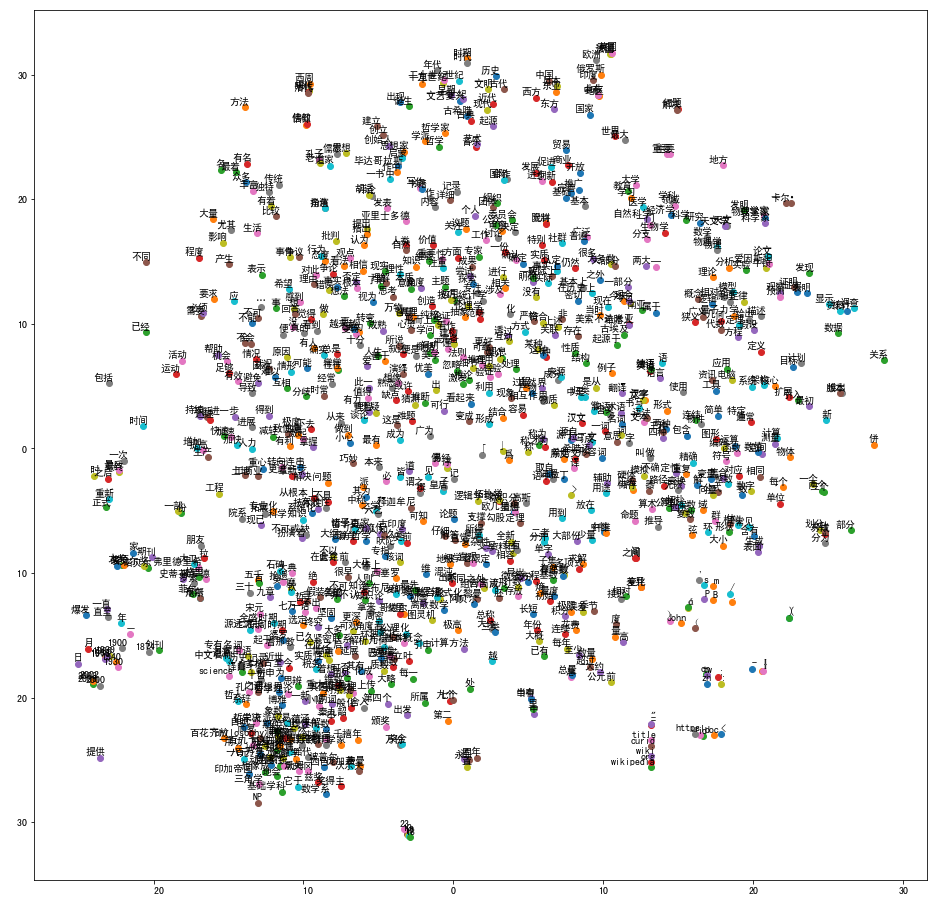

In [28]:
tsne_plot(model)